# DEMs to hypergraph

In [1]:
from hamld.contraction_strategy.dem_to_hypergraph import DetectorErrorModelHypergraph
import stim

input circuit

In [2]:
circuit_noisy = stim.Circuit.from_file("../data/external/google23/surface_code_bZ_d3_r01_center_3_5/circuit_noisy.stim")
detector_error_model = circuit_noisy.detector_error_model()

no logical observable

In [3]:
hypergraph = DetectorErrorModelHypergraph(detector_error_model=detector_error_model)

这里我们只是简单的删除了L0节点，边并没有删除，除非只引起L0。

但在论文描述中，我们直接把与L0相关的边，以及长度为1的边直接删除了，因为为了更加清晰的讲述原理。因为我们只考虑一个逻辑比特，所以L0引起的维度增加为2倍。长度为1的边，最多等于节点数。这并不是限制解码的关键瓶颈。

In [4]:
nodes = hypergraph.get_nodes()
hyperedges = hypergraph.get_hyperedges()
weights = hypergraph.get_weights()

print(f"nodes: {nodes}")
print(f"hyperedges: {hyperedges}")
print(f"weights: {weights}")
print(len(weights))

nodes: ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']
hyperedges: [('D0', 'D2'), ('D0', 'D3'), ('D0', 'D4'), ('D0', 'D5'), ('D0', 'D7'), ('D0',), ('D1', 'D3'), ('D1', 'D5'), ('D1',), ('D2',), ('D2', 'D4'), ('D2', 'D6'), ('D2', 'D7'), ('D3',), ('D3', 'D5'), ('D3', 'D7'), ('D4', 'D6'), ('D4', 'D7'), ('D4',), ('D5', 'D7'), ('D5',), ('D6',), ('D7',)]
weights: [Decimal('0.009889001998225533177'), Decimal('0.00341034964997319421'), Decimal('0.03291221673144394122'), Decimal('0.004339564937828519452'), Decimal('0.009216729243890903894'), Decimal('0.01450610421900354503'), Decimal('0.004004146218508711219'), Decimal('0.02995059965053570306'), Decimal('0.00278520586931981038'), Decimal('0.009651310857700426057'), Decimal('0.004880745186528980331'), Decimal('0.02526291438116837554'), Decimal('0.004677532145399821394'), Decimal('0.01769771795187230837'), Decimal('0.003253647506008654385'), Decimal('0.03571464729963994694'), Decimal('0.0139547988927337472'), Decimal('0.01603336385596291006'), De

have logical observable node

In [5]:
hypergraph = DetectorErrorModelHypergraph(detector_error_model=detector_error_model, have_logical_observable=True)
nodes = hypergraph.get_nodes()
hyperedges = hypergraph.get_hyperedges()
weights = hypergraph.get_weights()

print(f"nodes: {nodes}")
print(f"hyperedges: {hyperedges}")
print(f"weights: {weights}")
print(len(weights))

nodes: ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'L0']
hyperedges: [('D0', 'D2'), ('D0', 'D3'), ('D0', 'D4'), ('D0', 'D5'), ('D0', 'D7'), ('D0', 'L0'), ('D1', 'D3'), ('D1', 'D5'), ('D1', 'L0'), ('D2',), ('D2', 'D4'), ('D2', 'D6'), ('D2', 'D7'), ('D3',), ('D3', 'D5'), ('D3', 'D7'), ('D4', 'D6'), ('D4', 'D7'), ('D4', 'L0'), ('D5', 'D7'), ('D5', 'L0'), ('D6',), ('D7',)]
weights: [Decimal('0.009889001998225533177'), Decimal('0.00341034964997319421'), Decimal('0.03291221673144394122'), Decimal('0.004339564937828519452'), Decimal('0.009216729243890903894'), Decimal('0.01450610421900354503'), Decimal('0.004004146218508711219'), Decimal('0.02995059965053570306'), Decimal('0.00278520586931981038'), Decimal('0.009651310857700426057'), Decimal('0.004880745186528980331'), Decimal('0.02526291438116837554'), Decimal('0.004677532145399821394'), Decimal('0.01769771795187230837'), Decimal('0.003253647506008654385'), Decimal('0.03571464729963994694'), Decimal('0.0139547988927337472'), Decimal('0.

draw by bipartite graph

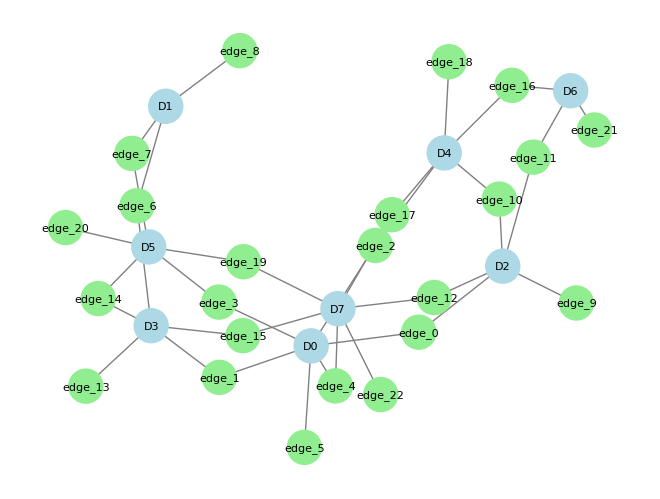

In [6]:
hypergraph = DetectorErrorModelHypergraph(detector_error_model=detector_error_model)
hypergraph.draw_bipartite_graph()

# hypergraph to connectivity graph

In [7]:
from hamld.contraction_strategy.hypergraph_to_connectivity import ConnectivityGraph

In [8]:
connectivity_graph = ConnectivityGraph()
connectivity_graph.hypergraph_to_connectivity_graph(hypergraph)

In [9]:
connectivity_graph.nodes

NodeView(('D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7'))

图节点和邻居获取

In [10]:
# 获取图中的所有节点
nodes = connectivity_graph.nodes()
print(f"nodes: {nodes}")
# 获取图中的所有边
edges = connectivity_graph.edges()
print(f"edges: {edges}")
# 获取指定节点的所有邻居
neighbors = list(connectivity_graph.neighbors('D1'))
print(f"neighbors: {neighbors}")
# 获取指定边的节点
node1, node2 = list(connectivity_graph.edges(('D0','D1')))[0]  # 获取与节点2相连的边的节点
print(f"node1, node2: {node1, node2}")

nodes: ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']
edges: [('D0', 'D2'), ('D0', 'D3'), ('D0', 'D4'), ('D0', 'D5'), ('D0', 'D7'), ('D1', 'D3'), ('D1', 'D5'), ('D2', 'D4'), ('D2', 'D6'), ('D2', 'D7'), ('D3', 'D5'), ('D3', 'D7'), ('D4', 'D6'), ('D4', 'D7'), ('D5', 'D7')]
neighbors: ['D3', 'D5']
node1, node2: ('D0', 'D2')


节点与边的删除

In [11]:
G = connectivity_graph.copy() # 创建图的副本
# 删除单个节点
print(f"G.nodes: {G.nodes}")
print(f"G.edges: {G.edges}")
G.remove_node("D3")
print("----------remove node D3------------")
print(f"G.nodes: {G.nodes}")
print(f"G.edges: {G.edges}")
# 删除多个节点
G.remove_nodes_from(['D0', 'D1'])
print("-----------remove node ['D0', 'D1']---------")
print(f"G.nodes: {G.nodes}")
print(f"G.edges: {G.edges}")
# 删除单个边
G.remove_edge('D2', 'D4')
print("---------remove ('D2', 'D4')---------")
print(f"G.nodes: {G.nodes}")
print(f"G.edges: {G.edges}")
# 删除多个边
G.remove_edges_from([('D2', 'D6'), ('D4', 'D6')])
print("---------remove [('D2', 'D6'), ('D4', 'D6')]---------")
print(f"G.nodes: {G.nodes}")
print(f"G.edges: {G.edges}")


G.nodes: ['D0', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7']
G.edges: [('D0', 'D2'), ('D0', 'D3'), ('D0', 'D4'), ('D0', 'D5'), ('D0', 'D7'), ('D1', 'D3'), ('D1', 'D5'), ('D2', 'D4'), ('D2', 'D6'), ('D2', 'D7'), ('D3', 'D5'), ('D3', 'D7'), ('D4', 'D6'), ('D4', 'D7'), ('D5', 'D7')]
----------remove node D3------------
G.nodes: ['D0', 'D1', 'D2', 'D4', 'D5', 'D6', 'D7']
G.edges: [('D0', 'D2'), ('D0', 'D4'), ('D0', 'D5'), ('D0', 'D7'), ('D1', 'D5'), ('D2', 'D4'), ('D2', 'D6'), ('D2', 'D7'), ('D4', 'D6'), ('D4', 'D7'), ('D5', 'D7')]
-----------remove node ['D0', 'D1']---------
G.nodes: ['D2', 'D4', 'D5', 'D6', 'D7']
G.edges: [('D2', 'D4'), ('D2', 'D6'), ('D2', 'D7'), ('D4', 'D6'), ('D4', 'D7'), ('D5', 'D7')]
---------remove ('D2', 'D4')---------
G.nodes: ['D2', 'D4', 'D5', 'D6', 'D7']
G.edges: [('D2', 'D6'), ('D2', 'D7'), ('D4', 'D6'), ('D4', 'D7'), ('D5', 'D7')]
---------remove [('D2', 'D6'), ('D4', 'D6')]---------
G.nodes: ['D2', 'D4', 'D5', 'D6', 'D7']
G.edges: [('D2', 'D7'), ('D4', 'D7'), 

## Connected graph draw

2025-08-26 21:54:38,309 - ./contraction_strategy/hypergraph_to_connectivity_graph - ERROR - Error: Graph does not have 'pos' attribute for nodes.
2025-08-26 21:54:38,310 - ./contraction_strategy/hypergraph_to_connectivity_graph - INFO - No 'pos' attribute, calling 2D draw method.


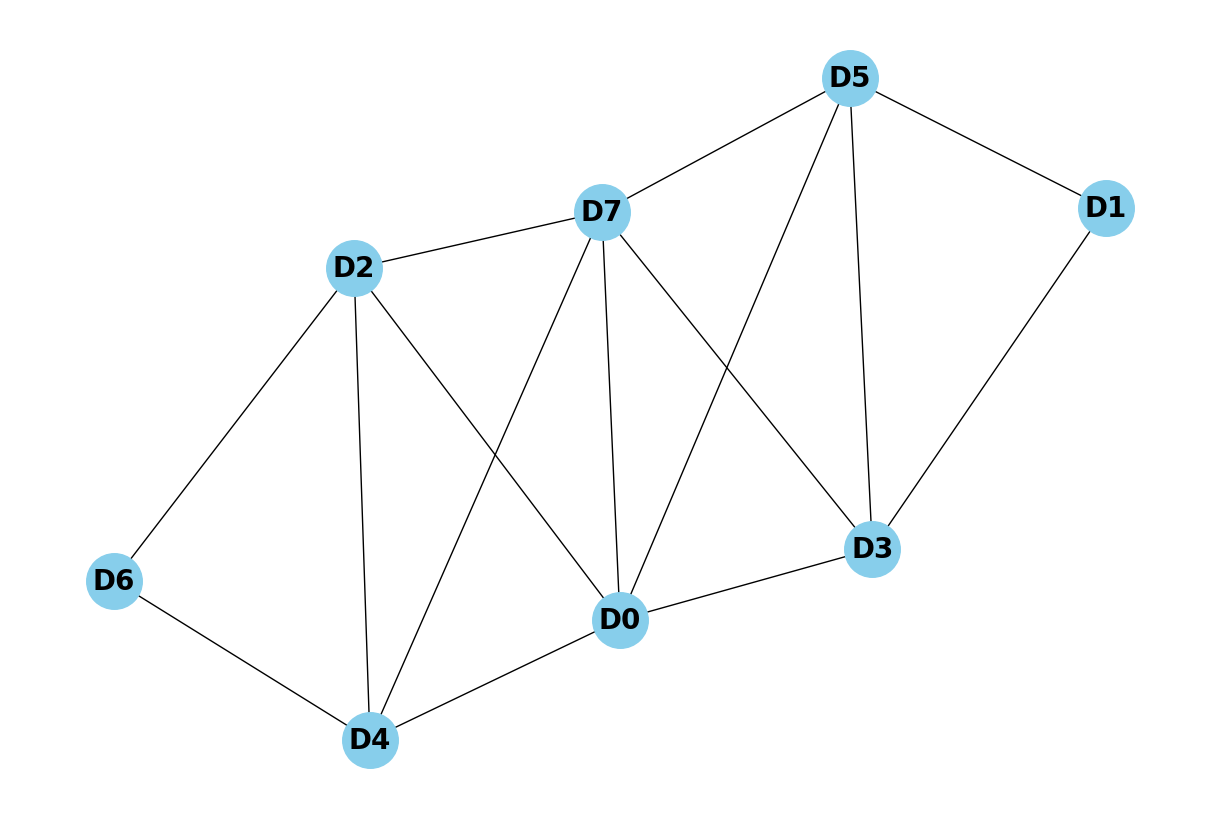

In [12]:
connectivity_graph = ConnectivityGraph()
connectivity_graph.hypergraph_to_connectivity_graph(hypergraph)

connectivity_graph.draw_with_pos()

2025-08-26 21:54:38,374 - ./contraction_strategy/hypergraph_to_connectivity_graph - INFO - Graph has 'pos' attribute, proceeding with drawing.


nodes_pos: {'D0': [2.0, 5.0, 0.0], 'D1': [4.0, 3.0, 0.0], 'D2': [2.0, 7.0, 0.0], 'D3': [4.0, 5.0, 0.0], 'D4': [2.0, 5.0, 1.0], 'D5': [4.0, 3.0, 1.0], 'D6': [2.0, 7.0, 1.0], 'D7': [4.0, 5.0, 1.0]}


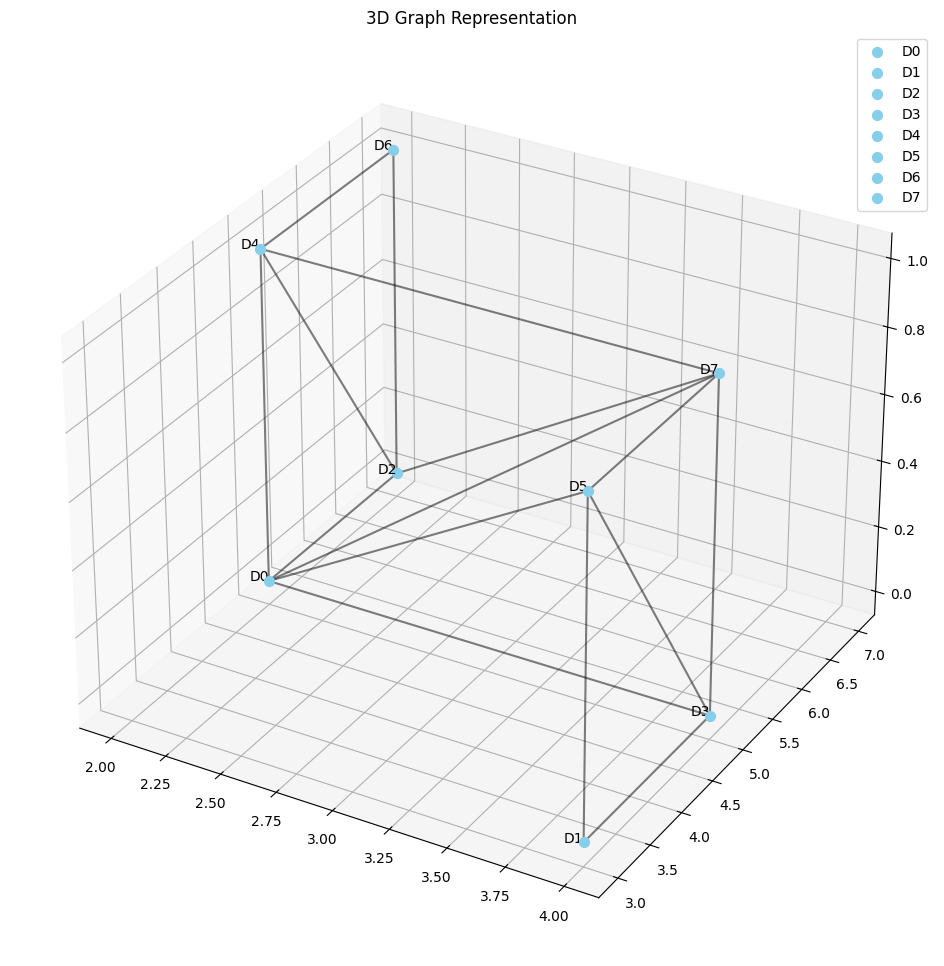

In [13]:
connectivity_graph.add_node_pos_from_dem(detector_error_model=detector_error_model)
pos = connectivity_graph.get_nodes_pos()
print(f"nodes_pos: {pos}")
connectivity_graph.draw_with_pos()